# MODULES ET DATASET

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

# IMPORT DES DONNEES

dimension de X (Matrice mxn des données) : (100, 2)
dimension de y (Vecteur colonne de dimension m) : (100, 1)


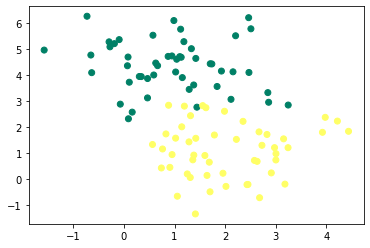

In [3]:
X,y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0) #Dataset 100 lignes (m=données), 2 colonnes (n=variables)
# X est une matrice comportant les données de chaque échantillon, X est de taille m données x n variables
# Y est le vecteur label de dimension m. Il associe à une ligne de X (càd un échantillon) son classement (O ou 1)
y = y.reshape((y.shape[0], 1)) # Passage des données label en vecteur colonne
X
print(f'dimension de X (Matrice mxn des données) : {X.shape}')
print(f'dimension de y (Vecteur colonne de dimension m) : {y.shape}')

plt.scatter(X[:,0], X[:,1], c=y, cmap="summer") # Affichage des valeurs des 2 variables (X[:, 0] et X[:, 1]) pour les 100 échantillons

# Modèle


1.   Initialisation du vecteur colonne W et du scalaire b 
2.   Calcul du vecteur colonne probabilités A
3.   Calcul de la véracité du modèle (fonction coût)
4.   Calcul des gradients des Wi et b
5.   Mise à jour des paramètres Wi et b via les gradients 
6.   Itération sur un train set pour régler les paramètres Wi et b jusqu'à une valeur finale
7.   Performance du modèle calculé sur un test set
8.   Prédictions



In [8]:
def initialisation(X):
  ''' Initialise le vecteur colonne W et le scalaire b à des valeurs random. Ce sont les paramètres du modèle à ajuster plus tard'''
  W = np.random.randn(X.shape[1], 1) 
  # W est un vecteur colonne de dimension le nombre de variables (=nb de colonnes de X). En effet, chaque paramètre à un poids qu'il faut ajuster
  b = np.random.randn(1) # Scalaire
  return W, b

In [9]:
def model(X, W, b):
  '''Calcul du vecteur colonne A'''
  Z = X.dot(W) + b
  A = 1 / (1 + np.exp(-Z)) # Vecteur colonne de dimension m contenant les probas pour chaque paramètre 
  return A

In [10]:
def log_loss(A, y):
  ''' Fonction coût, retourne un scalaire sur la véracité du modèle'''
  return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1-A))

In [11]:
def gradients(A, X, y):
  ''' Calcul des gradients '''
  dW = 1/ len(y) * np.dot(X.T, A-y) #Vecteur colonne de dimension m
  db = 1/ len(y) * np.sum(A - y) # Scalaire
  return dW, db

In [12]:
def update(dW, db, W, b, learning_rate):
  ''' Met à jour le modèle en ajustant les paramètres W et b'''
  W = W - learning_rate * dW 
# Si le gradient (dW) devient nul, W converge vers une valeur finale. Or ce gradient ne cv que si A-y --> 0, c'est à dire les probas mesurées --> 1 
  b = b - learning_rate * db
  return W, b

In [41]:
def predict(X, W, b, printProba = False):
  ''' Calcul le vecteur probas A pour un jeu de donnée X avec le modèle réglé aux paras W et b '''
  A = model(X, W, b)
  if printProba : print(A)
  return A >= 0.5 # Si la proba est >= 0.5, retourne True

In [42]:
def artificial_neuron(X, y, learning_rate=0.1, n_iter=100):
  ''' Applique le procédé itératif : 
    -Calcul du vecteur colonne proba
    -Calcul l'erreur (le coût)
    -Calcul du vecteur colonne gradient W et du scalaire gradient b (càd l'évolution de l'erreur en fonction de W et b qui varient)
    -Mise à jour de W et b
  '''
  # Initialisation des para W et b
  W, b = initialisation(X)

  Loss = [] #Liste des coûts

  # Itération pour calculer W et b
  for i in range(n_iter):
    A = model(X, W, b)
    Loss.append(log_loss(A, y)) #Coût
    dW, db = gradients (A, X, y) # Gradients
    W, b = update(dW, db, W, b, learning_rate) # Calcul des para

  y_pred = predict(X, W, b) # Calcul du vecteur colonne des prédictions 
  print(f'Performance du modèle : {accuracy_score(y, y_pred)}\n') # Comparaison des résultats prédits avec les résultats réels

  plt.plot(Loss)
  plt.show()

  return W, b



Performance du modèle : 0.88



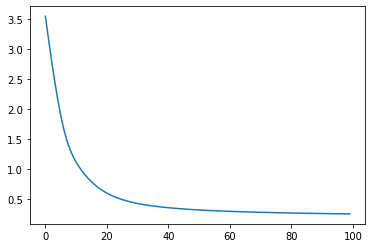

(array([[ 1.17149574],
       [-0.89636249]]), array([0.17879072]))


In [43]:
print(artificial_neuron(X, y))

# Test du modèle sur une prédiction

Performance du modèle : 0.88



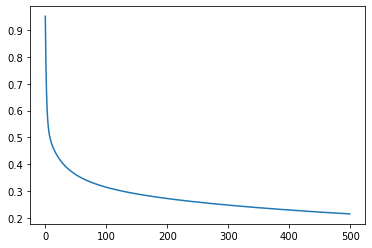

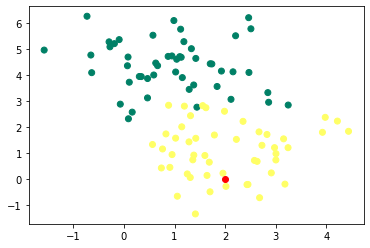

[0.98577347]


array([ True])

In [49]:
test = np.array([2, 0]) # Matrice 1x2 contenant les valeurs des deux variables
W, b = artificial_neuron(X, y, learning_rate=0.1, n_iter=500)

plt.scatter(X[:,0], X[:,1], c=y, cmap="summer") # Affichage des valeurs des 2 variables (X[:, 0] et X[:, 1]) pour les 100 échantillons
plt.scatter(test[0], test[1], c='r') # Affichage de la valeur test
plt.show()
predict(test, W, b, printProba = True)

# Tracé frontière de décision
Calcul de l'ensemble des points x0 et x1 tq
z(x0, x1) = 0 (càd proba = 0.5), soit 
w0.x0 + w1.x1 + b = 0

L'ensemble de ces points vérifiant cette équation forme un hyperplan. Donc en dimension 2 (2 variables), cela formera une droite.
En dimension 3, un plan ...

Fixons 100 points x0 variant entre -1 et 4, on a alors 
x1 = f(x0)

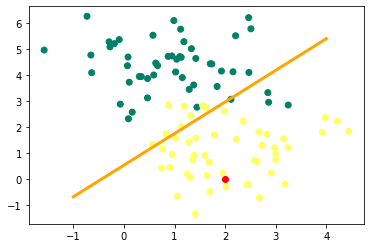

[0.98577347]


array([ True])

In [50]:
x0 = np.linspace(-1, 4, 100)
x1 = (-W[0] * x0 - b) / W[1] # A = 0.5 <=> w0.x0 + w1.x1 + b = 0
plt.scatter(X[:,0], X[:,1], c=y, cmap="summer") # Affichage des valeurs des 2 variables (X[:, 0] et X[:, 1]) pour les 100 échantillons
plt.scatter(test[0], test[1], c='r') # Affichage de la valeur test
plt.plot(x0, x1, c='orange', lw=3)
plt.show()
predict(test, W, b, printProba = True)